In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
tf.__version__

'2.4.1'

In [25]:
keras.__version__

'2.4.0'

In [26]:
n_neurons = 3
n_features = 2

# make a sequential model
model = keras.models.Sequential()

# the model will take as input arrays of shape (*, 2)
# and output arrays of shape (*, 3)
model.add(keras.layers.Dense(n_neurons, input_shape=(n_features,), activation="softmax"))

In [27]:
model.layers

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


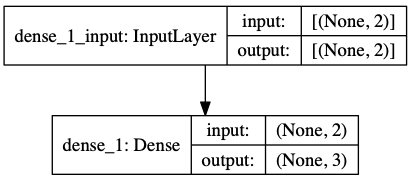

In [29]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [30]:
output = model.layers[0]
output.name

'dense_1'

In [31]:
weights, biases = output.get_weights()

In [32]:
weights.shape

(2, 3)

In [33]:
weights

array([[ 0.7234212 , -0.20713383, -0.07283556],
       [ 0.41011572, -0.01939404, -0.31272352]], dtype=float32)

In [34]:
biases.shape

(3,)

In [35]:
biases

array([0., 0., 0.], dtype=float32)

In [36]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [37]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = iris.target

In [38]:
X.shape

(150, 2)

In [39]:
y.shape

(150,)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 3.4967 - accuracy: 0.3428
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 2.9059 - accuracy: 0.3053
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 2.1741 - accuracy: 0.3355
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 1.7252 - accuracy: 0.3094
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 1.4602 - accuracy: 0.2382
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.3116 - accuracy: 0.0061
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2119 - accuracy: 0.1326
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 1.1641 - accuracy: 0.3162
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1164 - accuracy: 0.3193
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0979 - accuracy: 0.3308
Epoch 11/100
4/4 [==========

In [42]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 4}

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

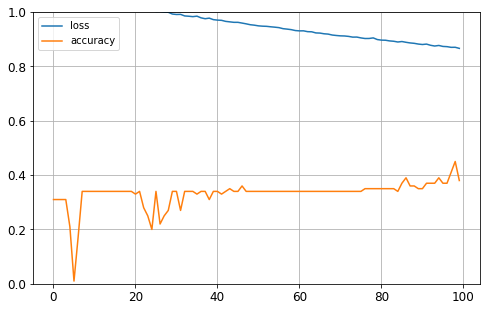

In [44]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [45]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 9ms/step - loss: 0.8837 - accuracy: 0.4200


[0.8837220072746277, 0.41999998688697815]

In [46]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.11, 0.43, 0.46],
       [0.32, 0.38, 0.3 ],
       [0.04, 0.42, 0.54]], dtype=float32)

In [47]:
y_pred = model.predict_classes(X_new)
y_pred

/Users/fpena/anaconda3/envs/coursera-deep-learning/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2, 1, 2])

In [48]:
y_new = y_test[:3]
y_new

array([1, 0, 2])

# MLP

In [49]:
n_output = 3
n_hidden = 4
n_features = 2

# make a sequential model
model = keras.models.Sequential()

# the model will take as input arrays of shape (*, 2)
# and output arrays of shape (*, 3)
model.add(keras.layers.Dense(n_hidden, input_shape=(n_features,), activation="relu"))
model.add(keras.layers.Dense(n_output, activation="softmax"))

In [50]:
model.layers

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


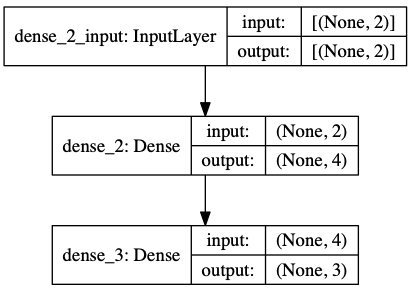

In [52]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [53]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [54]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = iris.target

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [56]:
history = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.1816 - accuracy: 0.3143
Epoch 2/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.1437 - accuracy: 0.3023
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.0826 - accuracy: 0.2910
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.0937 - accuracy: 0.3298
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.0589 - accuracy: 0.3381
Epoch 6/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0362 - accuracy: 0.3402
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0669 - accuracy: 0.3235
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.0347 - accuracy: 0.3183
Epoch 9/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.9893 - accuracy: 0.3610
Epoch 10/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.0051 - accuracy: 0.3141
Epoch 11/1000
4/4 [

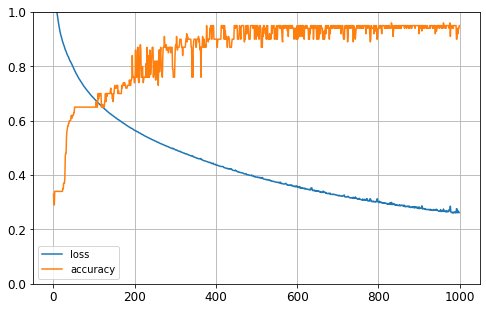

In [57]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()